### Problem Statement: To successfully an Image in a category based on the user input

##### We will be using TensorFlow and Keras to classify images

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

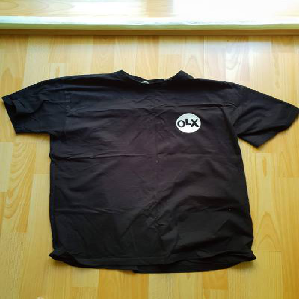

In [14]:
name = 'images/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
img = load_img(name, target_size=(299, 299))
img

In [15]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [16]:
x.shape

(299, 299, 3)

#### Pre-Trained Convolutional Neural Networks

In [17]:
#import pre-trained model Xception 
from keras.applications.xception import Xception

#import preprocess_input to process the input 
from keras.applications.xception import preprocess_input

#import decode_predictions to decode output  
from keras.applications.xception import decode_predictions

In [18]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))



91884032/91884032 [==============================] - 3s 0us/step


In [19]:
X = np.array([x])

In [20]:
X.shape

(1, 299, 299, 3)

In [21]:
#turns the result into values between -1 to 1 from 0-255 
X = preprocess_input(X)

In [22]:
pred = model.predict(X)
pred

1/1 [==============================] - 1s 1s/step


array([[3.23798216e-04, 1.57364659e-04, 2.14056345e-04, 1.52957582e-04,
        2.46566342e-04, 3.04462941e-04, 3.23488202e-04, 1.47259823e-04,
        2.04866359e-04, 1.48656472e-04, 1.95694491e-04, 2.11569582e-04,
        7.61280025e-05, 1.14591843e-04, 1.64077923e-04, 2.07021862e-04,
        1.96368434e-04, 1.44515041e-04, 1.40078933e-04, 1.73652064e-04,
        7.50313862e-04, 2.55689083e-04, 2.66563235e-04, 2.96250131e-04,
        3.71849805e-04, 2.81153771e-04, 2.16760178e-04, 2.26842094e-04,
        3.82646889e-04, 1.72123473e-04, 3.08604678e-04, 1.97759917e-04,
        3.93642636e-04, 4.78196511e-04, 2.90634867e-04, 3.26481008e-04,
        1.47040497e-04, 1.63522433e-04, 2.14073094e-04, 1.34215035e-04,
        2.41730566e-04, 6.72483700e-04, 2.53320090e-04, 1.42904406e-04,
        4.11026966e-04, 2.05692704e-04, 3.04203189e-04, 1.49993954e-04,
        2.00595634e-04, 2.28325240e-04, 2.97197286e-04, 2.30767517e-04,
        6.29547809e-04, 7.80997681e-04, 2.47868593e-04, 4.030112

In [23]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.67924446),
  ('n02916936', 'bulletproof_vest', 0.039600294),
  ('n04370456', 'sweatshirt', 0.035299595),
  ('n03710637', 'maillot', 0.010884158),
  ('n04525038', 'velvet', 0.0018057639)]]

#### Insight: The pretrained model (Xception) doesn't identify as well as we want it to.

#### Convolutional Neural Networks (CNN)